In [2]:
#import statement
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy.linalg import eig
from numpy.linalg import eig

In [4]:
# 2D data
data = np.array([[3,4],[2,8],[6,9],[10,12]])

In [5]:
print(data)

[[ 3  4]
 [ 2  8]
 [ 6  9]
 [10 12]]


In [7]:
#creating dataframe
df = pd.DataFrame(data, columns=["ml", "dl"])

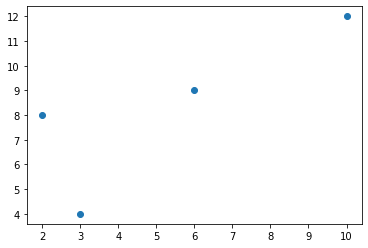

In [9]:
plt.scatter(df["ml"], df["dl"])

In [11]:
# PCA-STEPS
# 1. standardization of data(Zero centric data)
# 2. cov matrix
# 3. eig value and eig vector
# 4. find principal component

In [12]:
data.T

array([[ 3,  2,  6, 10],
       [ 4,  8,  9, 12]])

In [16]:
meanbycolumn = np.mean(data, axis=0)

In [17]:
np.mean(data.T, axis=1)

array([5.25, 8.25])

In [27]:
scaled_data =data - meanbycolumn
scaled_data

array([[-2.25, -4.25],
       [-3.25, -0.25],
       [ 0.75,  0.75],
       [ 4.75,  3.75]])

In [31]:
# step -2  Covariance metrix b'coz we want relation b/w varable 
cov_mat = np.cov(scaled_data.T)

In [35]:

# step-3  Eigen value and vector
eig_val, eig_vec = np.linalg.eig(cov_mat)

In [36]:
eig_val

array([21.55203266,  2.28130068])

In [37]:
eig_vec

array([[ 0.74289445, -0.66940857],
       [ 0.66940857,  0.74289445]])

In [44]:
# PCA
eig_vec.T.dot(scaled_data.T).T

array([[-4.51649894, -1.65113213],
       [-2.58175911,  1.98985424],
       [ 1.05922727,  0.05511441],
       [ 6.03903078, -0.39383652]])

In [45]:
#  Same as above for PCA

from sklearn.decomposition import PCA 
pca = PCA()

In [46]:
pca.fit_transform(scaled_data)

array([[-4.51649894, -1.65113213],
       [-2.58175911,  1.98985424],
       [ 1.05922727,  0.05511441],
       [ 6.03903078, -0.39383652]])

In [49]:
pd.DataFrame(pca.fit_transform(scaled_data), columns=["PCA1", "PCA2"])

,PCA1,PCA2
0,-4.516499,-1.651132
1,-2.581759,1.989854
2,1.059227,0.055114
3,6.039031,-0.393837


In [50]:
pca.inverse_transform(pca.fit_transform(scaled_data))

array([[-2.25, -4.25],
       [-3.25, -0.25],
       [ 0.75,  0.75],
       [ 4.75,  3.75]])

In [51]:
pca.explained_variance_ratio_

array([0.90428109, 0.09571891])

In [52]:
# Real Practical

In [56]:
new_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data")
new_data

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [60]:
# new_data.drop(labels=['index','Class'],axis=1)
new_data.isnull().sum()

1          0
1.52101    0
13.64      0
4.49       0
1.10       0
71.78      0
0.06       0
8.75       0
0.00       0
0.00.1     0
1.1        0
dtype: int64

In [62]:
new_data.describe()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [63]:
# PCA 
# Step1 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [66]:
scaled_data = scaler.fit_transform(new_data)

In [67]:
scaled_df = pd.DataFrame(data=scaled_data, columns=new_data.columns)
scaled_df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,-1.723938,-0.245101,0.591880,0.642937,-0.173500,0.097091,-0.029329,-0.792599,-0.353808,-0.588301,-0.851703
1,-1.707675,-0.716826,0.150946,0.608144,0.187433,0.433777,-0.167472,-0.827734,-0.353808,-0.588301,-0.851703
2,-1.691411,-0.228607,-0.240996,0.705564,-0.313863,-0.058303,0.108813,-0.518546,-0.353808,-0.588301,-0.851703
3,-1.675147,-0.307777,-0.167507,0.656854,-0.414122,0.550322,0.078115,-0.623951,-0.353808,-0.588301,-0.851703
4,-1.658884,-0.789399,-0.755419,0.649895,0.347848,0.407878,0.216258,-0.623951,-0.353808,2.082200,-0.851703
...,...,...,...,...,...,...,...,...,...,...,...
208,1.658884,-0.700332,0.898085,-1.862164,2.874379,-0.058303,-0.643296,0.156046,1.778672,-0.588301,2.005192
209,1.675147,-0.495808,1.853443,-1.862164,1.089766,0.524423,-0.766090,-0.392060,2.844912,-0.588301,2.005192
210,1.691411,0.757727,1.167545,-1.862164,1.149921,0.990604,-0.766090,-0.363952,2.945501,-0.588301,2.005192
211,1.707675,-0.607966,1.192041,-1.862164,0.989506,1.236644,-0.766090,-0.335844,2.804676,-0.588301,2.005192


In [68]:
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
1,213.0,6.671763e-17,1.002356,-1.723938,-0.861969,0.000000,0.861969,1.723938
1.52101,213.0,-5.837792e-15,1.002356,-2.376110,-0.604667,-0.222009,0.262911,5.138502
13.64,213.0,-1.717979e-15,1.002356,-3.278544,-0.620689,-0.130762,0.518391,4.866495
4.49,213.0,6.671763e-17,1.002356,-1.862164,-0.407814,0.559433,0.642937,0.907364
1.10,213.0,-1.000764e-16,1.002356,-2.319047,-0.514381,-0.173500,0.367899,4.117593
71.78,213.0,1.460491e-14,1.002356,-3.684153,-0.485635,0.174787,0.563271,3.567547
0.06,213.0,-4.169852e-17,1.002356,-0.766090,-0.566550,0.093464,0.170210,8.765749
8.75,213.0,-3.836264e-16,1.002356,-2.479079,-0.504492,-0.251520,0.156046,5.081972
0.00,213.0,-3.335881e-17,1.002356,-0.353808,-0.353808,-0.353808,-0.353808,5.983278
0.00.1,213.0,-1.355202e-17,1.002356,-0.588301,-0.588301,-0.588301,0.438815,4.649990


In [69]:
from sklearn.decomposition import PCA
pca=PCA() 

In [71]:
pca_df = pd.DataFrame(pca.fit_transform(scaled_df))

In [72]:
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-1.302839,-1.195675,-0.536093,0.896697,-0.292439,0.472090,-0.398065,0.912230,0.362590,-0.109692,-0.002278
1,-1.181611,-1.575000,-0.551215,0.353988,-0.273254,0.736061,-0.685511,0.714193,0.227716,0.024023,0.030307
2,-1.632798,-0.972789,-0.133441,0.492620,-0.508826,0.665514,-0.262891,0.529586,0.281948,0.184329,0.103254
3,-1.561819,-1.202281,-0.513530,0.161779,-0.464099,0.710991,-0.078618,0.634229,0.350285,0.002259,0.011541
4,-1.690608,-1.270442,0.782988,-0.918469,1.782350,0.391254,-0.563132,0.725465,0.326075,0.262843,0.011570
